In [1]:
import numpy as np
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from nltk.corpus import brown
brown.words()

import pickle
tweets = []
file_destination = '10ktweetsjan2020.jsonl'
with (open(file_destination, "rb")) as openfile:  # opening file
    tweets.append(pickle.load(openfile))  # loading file
    tweets = tweets[0]  # reducing from a list of lists to lists

tweets_text = []
for tweet in tweets:
    tweets_text.append(tweet['full_text'])

tweets_text[0]

from nltk.tokenize import sent_tokenize, word_tokenize
sent_tokenize(tweets_text[0])
word_tokenize(tweets_text[0])

['RT',
 '@',
 'AnneKPIX',
 ':',
 '@',
 'CDC',
 'has',
 'activated',
 'its',
 'emergency',
 'operations',
 'center',
 '.',
 'They',
 'expect',
 'more',
 'US',
 'cases',
 '.',
 '#',
 'coronavirus']

Question 1:
Perform any two analysis based on methods discussed after the midterm in the class on the tweets of the dataset. You can choose the ones from the past assignment with slight modification.

Analysis 1: To find tweets having two or more hashtags

In [3]:
import re

def find_tweets_with_multiple_hashtags(tweets):
    tweets_with_multiple_hashtags = []

    for i, tweet in enumerate(tweets):
        hashtags = re.findall(r'#\w+', tweet['full_text'])

        # Check if the tweet has two or more hashtags
        if len(hashtags) >= 2:
            tweets_with_multiple_hashtags.append({
                'index': i + 1,  
                'hashtags': hashtags,
                'text': tweet['full_text']
            })

    return tweets_with_multiple_hashtags

tweets_with_multiple_hashtags = find_tweets_with_multiple_hashtags(tweets)

for tweet_info in tweets_with_multiple_hashtags:
    print(f"Tweet {tweet_info['index']}: {tweet_info['text']}")
    print(f"Hashtags: {tweet_info['hashtags']}")
    print()

Tweet 3: RT @CDCgov: The first human infection with new #coronavirus (#2019-nCoV) has been reported in the US in a person who recently traveled to W…
Hashtags: ['#coronavirus', '#2019']

Tweet 7: RT @StocksUnhinged: $SPY $AAL $APT $EXPE  $GOOG $DAL $UAL $BA $LAKE $YUM $CMG $HUM $CI 

#CDC expected to announce first US case of #Wuhan…
Hashtags: ['#CDC', '#Wuhan']

Tweet 14: RT @MerlinofCanada: It's here folks
A traveller from #China has been diagnosed in Seattle with the new #coronavirus, a spokesperson from th…
Hashtags: ['#China', '#coronavirus']

Tweet 28: RT @CDCgov: The first human infection with new #coronavirus (#2019-nCoV) has been reported in the US in a person who recently traveled to W…
Hashtags: ['#coronavirus', '#2019']

Tweet 32: Updated travel notice on travel to China from @CDCgov
 #nCoV #nCoV2019 #Wuhan

Novel Coronavirus in China - Alert - Level 2, Practice Enhanced Precautions - Travel Health Notices | Travelers' Health | CDC https://t.co/VTlJSG4M3f
Hashtags: ['#nCoV'

Analysis 2: To find the account who tweeted the maximum tweets

In [4]:
from collections import Counter

def find_account_with_max_tweets(tweets):
    
    account_names = [tweet['user']['screen_name'] for tweet in tweets]

    account_counts = Counter(account_names)

    # Find the account with the maximum number of tweets
    max_account, max_tweet_count = account_counts.most_common(1)[0]

    return max_account, max_tweet_count

# Example usage:
max_account, max_tweet_count = find_account_with_max_tweets(tweets)

print(f"The account '{max_account}' tweeted the most with {max_tweet_count} tweets.")

The account '4Tchat' tweeted the most with 20 tweets.


Analysis 3: Find the user who has used maximum of hashtags in their tweets

In [6]:
def find_user_with_max_hashtags(tweets):
    
    user_hashtag_counts = {}

    for tweet in tweets:
        user = tweet['user']['screen_name']
        hashtags = re.findall(r'#\w+', tweet['full_text'])
        hashtag_count = len(hashtags)

        # Update user's hashtag count in the dictionary
        if user in user_hashtag_counts:
            user_hashtag_counts[user] += hashtag_count
        else:
            user_hashtag_counts[user] = hashtag_count

    # Find the user with the maximum hashtag count
    max_user, max_hashtag_count = max(user_hashtag_counts.items(), key=lambda x: x[1])

    max_user_hashtags = re.findall(r'#\w+', next(tweet['full_text'] for tweet in tweets if tweet['user']['screen_name'] == max_user))
    print(f"The user '{max_user}' has used the maximum hashtags with {max_hashtag_count} hashtags.")
    print(f"The hashtags used by '{max_user}': {', '.join(max_user_hashtags)}")

find_user_with_max_hashtags(tweets)

The user 'blogosum' has used the maximum hashtags with 45 hashtags.
The hashtags used by 'blogosum': #news, #travel, #news, #vacation, #trips, #cruise, #cruises, #holiday, #hotels, #resorts, #airport, #flights, #outdoor, #travelnews, #traveltip


Question 2:
Explore any two of the interesting questions from the midterm (you can pivot).

The source location of the user having highest number of favourites

In [19]:
user_favorites = {}
for tweet in tweets:
    user = tweet['user']['screen_name']
    favorites_count = tweet['favorite_count']

    if user in user_favorites:
        user_favorites[user] += favorites_count
    else:
        user_favorites[user] = favorites_count

max_user = max(user_favorites, key=user_favorites.get)
max_favorites_count = user_favorites[max_user]

source_location = next(tweet['user']['location'] for tweet in tweets if tweet['user']['screen_name'] == max_user)

print(f"The user '{max_user}' has the highest number of favorites ({max_favorites_count}).")
print(f"Source Location of '{max_user}': {source_location}")

The user 'WHO' has the highest number of favorites (2088).
Source Location of 'WHO': Geneva, Switzerland


The top 5 most popular tweets were tweeted from which location and what was the source of internet used to perform the tweet

In [27]:
sorted_tweets = sorted(tweets, key=lambda tweet: tweet['retweet_count'], reverse=True)

for i in range(min(5, len(sorted_tweets))):
    tweet = sorted_tweets[i]
    user_location = tweet['user']['location']
    user_name = tweet['user']['screen_name']
    tweet_text = tweet['full_text']
    retweet_count = tweet['retweet_count']
    tweet_source = tweet['source']

    print(f"\nTop {i + 1} most popular tweet ({retweet_count} retweets):")
    print(f"User Name: {user_name}")
    print(f"User Location: {user_location}")
    print(f"Source of Internet: {tweet_source}")
    print(f"Tweet Text: {tweet_text}")



Top 1 most popular tweet (55709 retweets):
User Name: 30_cdc
User Location: Valenton, France
Source of Internet: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Tweet Text: RT @ILoveMyCulture: TURN IT OFF 😂😂😂😂 https://t.co/fkDnis9wiz

Top 2 most popular tweet (18346 retweets):
User Name: Cdc_14
User Location: 
Source of Internet: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Tweet Text: RT @berttoJRR: THIS IS UNITY. SISTERS LIL KIM, MISSY, DA BRAT https://t.co/xXVRsK34vM

Top 3 most popular tweet (17787 retweets):
User Name: 30_cdc
User Location: Valenton, France
Source of Internet: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Tweet Text: RT @Azheee_: I have so many questions https://t.co/bLKqeKrdza

Top 4 most popular tweet (4219 retweets):
User Name: nelsose
User Location: Texas
Source of Internet: <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Andr

Question 3:
Perform at least 4 visualization on the dataset.

Bar Chart of Tweet Sources :

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing fr

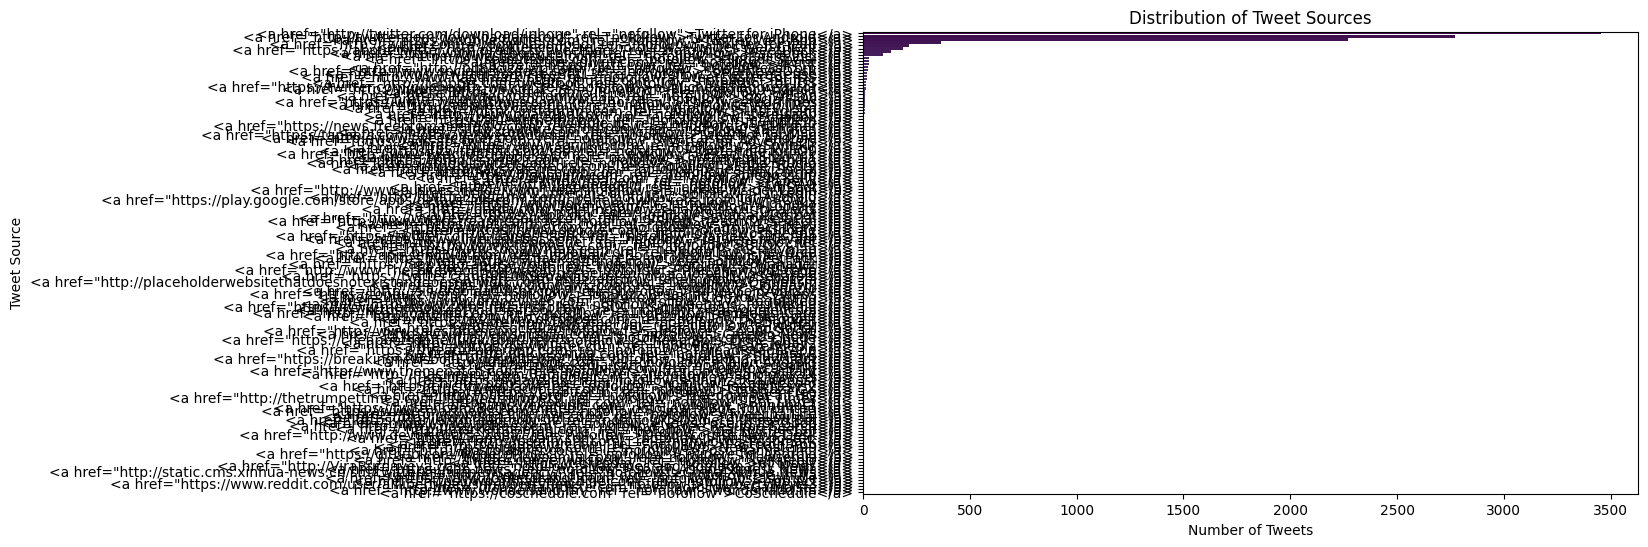

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tweet_sources = [tweet['source'] for tweet in tweets]

plt.figure(figsize=(10, 6))
sns.countplot(y=tweet_sources, order=pd.Series(tweet_sources).value_counts().index, palette='viridis')
plt.title('Distribution of Tweet Sources')
plt.xlabel('Number of Tweets')
plt.ylabel('Tweet Source')
plt.show()

In [13]:
!pip install seaborn wordcloud nltk

Word Cloud of Hashtags:

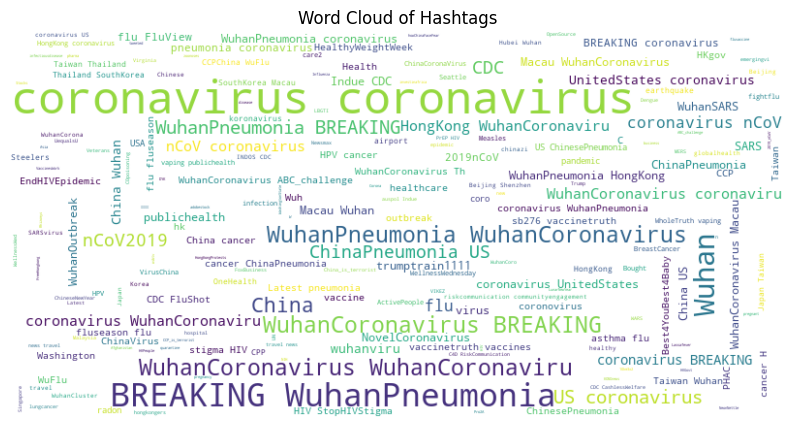

In [14]:
from wordcloud import WordCloud

all_hashtags = re.findall(r'#\w+', ' '.join(tweets_text))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_hashtags))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags')
plt.show()

Time Series Line Chart:

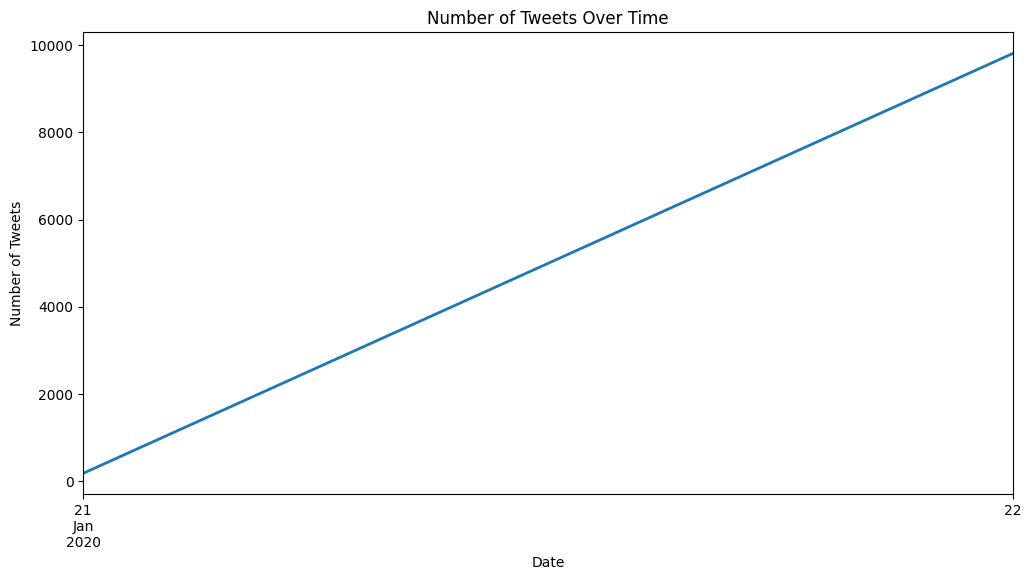

In [15]:
tweet_dates = [pd.to_datetime(tweet['created_at']) for tweet in tweets]

# Create a time series line chart
plt.figure(figsize=(12, 6))
pd.Series(1, index=tweet_dates).resample('D').sum().plot(lw=2)
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()


Sentiment Distribution Pie Chart:

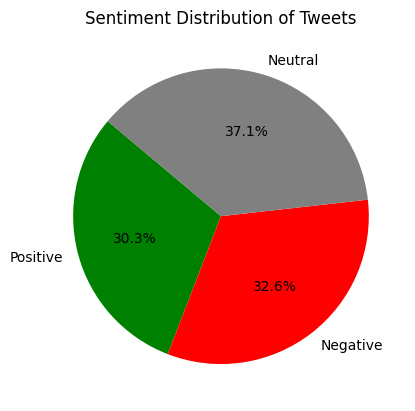

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
tweets_text = [tweet['full_text'] for tweet in tweets]

sentiment_scores = [sid.polarity_scores(text)['compound'] for text in tweets_text]

positive_tweets = sum(score > 0 for score in sentiment_scores)
negative_tweets = sum(score < 0 for score in sentiment_scores)
neutral_tweets = sum(score == 0 for score in sentiment_scores)

labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_tweets, negative_tweets, neutral_tweets]
colors = ['green', 'red', 'gray']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Tweets')
plt.show()